# Predicting 28-Day Concrete Compressive Strength Using Machine Learning

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


## Load Dataset

In [2]:
!pip install ucimlrepo


In [3]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset by ID (165 = Concrete Compressive Strength)
concrete_data = fetch_ucirepo(id=165)

# Extract features (X) and target (y)
X = concrete_data.data.features
y = concrete_data.data.targets

# Check data
print(X.head())
print(y.head())


   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  
0            1040.0           676.0   28  
1            1055.0           676.0   28  
2             932.0           594.0  270  
3             932.0           594.0  365  
4             978.4           825.5  360  
   Concrete compressive strength
0                          79.99
1                          61.89
2                          40.27
3                          41.05
4                          44.30


In [4]:

# Combine features and target into one table
df = pd.concat([X, y], axis=1)

# Now you can use df just like normal
print(df.head())         # View first 5 rows
print(df.describe())     # View stats summary
print(df.columns)        # View column names
print(df.shape)          # View (rows, columns)


   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Concrete compressive strength  
0            1040.0           676.0   28                          79.99  
1            1055.0           676.0   28                          61.89  
2             932.0           594.0  270                          40.27  
3             932.0           594.0  365                          41.05  
4             978.4           825.5  360                          44.30  
            Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.16786

In [5]:
# Show the first 5 rows
df.head()



,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.columns


Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

In [7]:
df.shape


(1030, 9)

In [8]:
df.describe()


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
df.isnull().sum()


,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Concrete compressive strength,0


In [10]:
df.columns = [
    'Cement', 'Slag', 'Fly Ash', 'Water', 'Superplasticizer',
    'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'
]


## Prepare Features and Target

In [11]:
X = df.drop('Strength', axis=1)
y = df['Strength']


## Train-Test Split

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 🔹 Scale features (optional but recommended for consistent performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


LinearRegression()

### Evaluate Model (Linear Regression)

In [14]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 🔹 Predict on test set
y_pred = lr.predict(X_test_scaled)

# 🔹 Evaluation
r2_Reg = r2_score(y_test, y_pred)
rmse_Reg = mean_squared_error(y_test, y_pred) ** 0.5
mae_Reg = mean_absolute_error(y_test, y_pred)

print(f"\n📈 R² Score (Linear Regression): {r2_Reg:.4f}")
print(f"📉 RMSE (Linear Regression): {rmse_Reg:.2f}")
print(f"📉 MAE (Linear Regression): {mae_Reg:.2f}")



📈 R² Score (Linear Regression): 0.6276
📉 RMSE (Linear Regression): 9.80
📉 MAE (Linear Regression): 7.75


## Predict Strength for a New Sample Mix

In [58]:

sample = [[
    350,  # Cement
     50,  # Slag
      0,  # Fly Ash
    160,  # Water
      5,  # Superplasticizer
   1000,  # Coarse Aggregate
    700,  # Fine Aggregate
     28   # Age (days)
]]

# 🔹 Scale sample with same scaler
sample_scaled = scaler.transform(sample)


predicted_strength = lr.predict(sample_scaled)
print(f"Predicted Strength (MPa): {predicted_strength[0]:.2f}")


Predicted Strength (MPa): 36.16


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Train Random Forest Model

In [15]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [16]:
y_pred = rf.predict(X_test)

## Evaluate Model (Random Forest)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2_RF = r2_score(y_test, y_pred)
mse_RF = mean_squared_error(y_test, y_pred)
rmse_RF = mse_RF ** 0.5
mae_RF = mean_absolute_error(y_test, y_pred)

print(f"\n📈 R2 Score: {r2_RF:.4f}")
print(f"📉 RMSE: {rmse_RF:.2f}")
print(f"📉 MAE: {mae_RF:.2f}")



📈 R2 Score: 0.8841
📉 RMSE: 5.46
📉 MAE: 3.74


## Predict Strength for a New Sample Mix

In [20]:

sample = [[
    350,  # Cement
     50,  # Slag
      0,  # Fly Ash
    160,  # Water
      5,  # Superplasticizer
   1000,  # Coarse Aggregate
    700,  # Fine Aggregate
     28   # Age (days)
]]

predicted_strength = rf.predict(sample)
print(f"Predicted Strength (MPa): {predicted_strength[0]:.2f}")


Predicted Strength (MPa): 59.49


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Train Neural Network Model

In [21]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# 🔹 Scale features (important for Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Train the MLPRegressor (Neural Network)
mlp = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu',
                   solver='adam', max_iter=1000, random_state=42)

mlp.fit(X_train_scaled, y_train)


MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=42)

### Evaluate Model (Neural Network)

In [22]:
# 🔹 Predict on test set
y_pred = mlp.predict(X_test_scaled)

# 🔹 Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_NN = r2_score(y_test, y_pred)
rmse_NN = mean_squared_error(y_test, y_pred) ** 0.5
mae_NN = mean_absolute_error(y_test, y_pred)

print(f"\n📈 R² Score (NN): {r2_NN:.4f}")
print(f"📉 RMSE (NN): {rmse_NN:.2f}")
print(f"📉 MAE (NN): {mae_NN:.2f}")



📈 R² Score (NN): 0.8608
📉 RMSE (NN): 5.99
📉 MAE (NN): 4.10


## Predict Strength for a New Sample (Neural Network)

In [23]:
# 🔹 New concrete mix sample

sample = [[
    350,  # Cement
     50,  # Slag
      0,  # Fly Ash
    160,  # Water
      5,  # Superplasticizer
   1000,  # Coarse Aggregate
    700,  # Fine Aggregate
     28   # Age (days)
]]

# 🔹 Scale sample with same scaler
sample_scaled = scaler.transform(sample)

# 🔹 Predict
predicted_strength = mlp.predict(sample_scaled)
print(f"\n🧱 Predicted Strength (MPa) with Neural Network: {predicted_strength[0]:.2f}")



🧱 Predicted Strength (MPa) with Neural Network: 53.37


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Visual Comparison of Models

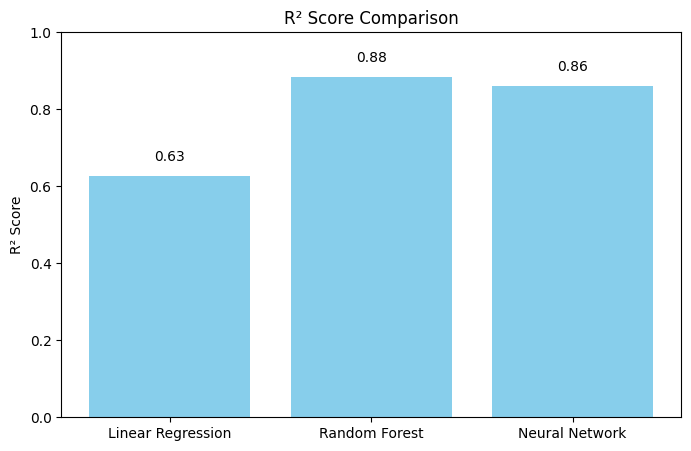

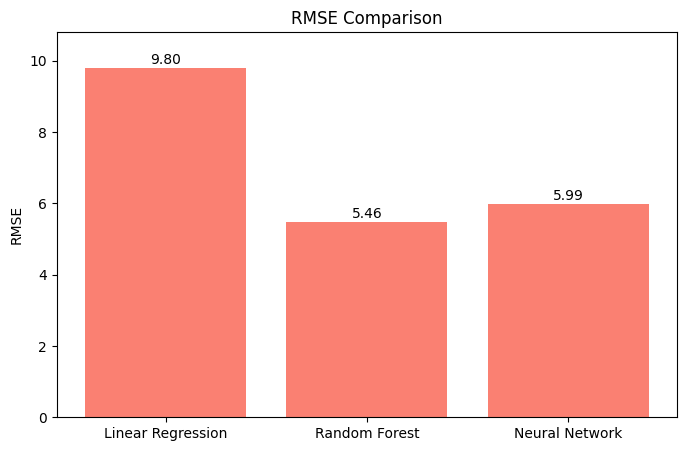

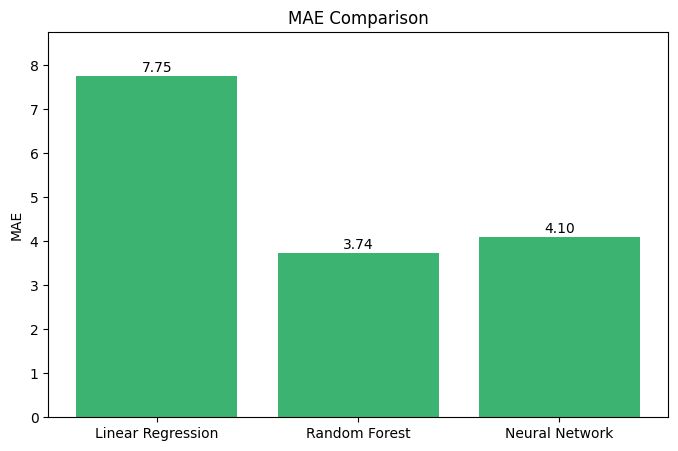

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Define model names and evaluation scores
model_names = ['Linear Regression', 'Random Forest', 'Neural Network']
r2_scores = [r2_Reg, r2_RF, r2_NN]
rmse_scores = [rmse_Reg, rmse_RF, rmse_NN]
mae_scores = [mae_Reg, mae_RF, mae_NN]

# Create DataFrame (optional)
df_scores = pd.DataFrame({
    'Model': model_names,
    'R2 Score': r2_scores,
    'RMSE': rmse_scores,
    'MAE': mae_scores
})

# Function to show numbers on top of bars
def annotate_bars(ax, values):
    for i, v in enumerate(values):
        ax.text(i, v + 0.03, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

# R² Score Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(model_names, r2_scores, color='skyblue')
ax.set_title("R² Score Comparison")
ax.set_ylabel("R² Score")
ax.set_ylim(0, 1.0)
annotate_bars(ax, r2_scores)
plt.show()

# RMSE Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(model_names, rmse_scores, color='salmon')
ax.set_title("RMSE Comparison")
ax.set_ylabel("RMSE")
ax.set_ylim(0, max(rmse_scores) + 1)
annotate_bars(ax, rmse_scores)
plt.show()

# MAE Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(model_names, mae_scores, color='mediumseagreen')
ax.set_title("MAE Comparison")
ax.set_ylabel("MAE")
ax.set_ylim(0, max(mae_scores) + 1)
annotate_bars(ax, mae_scores)
plt.show()


In [29]:
import gradio as gr


In [52]:
def predict_strength(cement, slag, fly_ash, water, superplasticizer, coarse, fine, age):
    sample = np.array([[cement, slag, fly_ash, water, superplasticizer, coarse, fine, age]])

    # Scale only for models that require it
    sample_scaled = scaler.transform(sample)

    lr_pred = lr.predict(sample_scaled)[0]       # Needs scaling
    rf_pred = rf.predict(sample)[0]              # Raw input for Random Forest
    nn_pred = mlp.predict(sample_scaled)[0]      # Needs scaling

    # Analysis
    preds = [lr_pred, rf_pred, nn_pred]
    max_pred = max(preds)
    min_pred = min(preds)
    diff = max_pred - min_pred

    if diff < 5:
        comment = "✅ All models agree reasonably well. Prediction is consistent."
    elif diff < 15:
        comment = "⚠️ Moderate disagreement. Consider further testing."
    else:
        comment = "❗ High disagreement. Use caution and consider domain validation."

    analysis = (
        f"🔍 Linear Regression: {lr_pred:.2f} MPa\n"
        f"🌲 Random Forest: {rf_pred:.2f} MPa\n"
        f"🧠 Neural Network: {nn_pred:.2f} MPa\n\n"
        f"📉 Prediction Range: {diff:.2f} MPa\n"
        f"{comment}"
    )

    return f"{lr_pred:.2f} MPa", f"{rf_pred:.2f} MPa", f"{nn_pred:.2f} MPa", analysis


In [53]:
# Create Gradio Interface
inputs = [
    gr.Slider(100, 600, value=350, label="Cement (kg/m³)"),
    gr.Slider(0, 300, value=50, label="Blast Furnace Slag (kg/m³)"),
    gr.Slider(0, 200, value=0, label="Fly Ash (kg/m³)"),
    gr.Slider(100, 250, value=160, label="Water (kg/m³)"),
    gr.Slider(0, 30, value=5, label="Superplasticizer (kg/m³)"),
    gr.Slider(800, 1200, value=1000, label="Coarse Aggregate (kg/m³)"),
    gr.Slider(600, 1000, value=700, label="Fine Aggregate (kg/m³)"),
    gr.Slider(1, 365, value=28, label="Age (days)"),
]

outputs = [
    gr.Textbox(label="Linear Regression (MPa)"),
    gr.Textbox(label="Random Forest (MPa)"),
    gr.Textbox(label="Neural Network (MPa)"),
]

In [35]:
!pip install gradio ucimlrepo scikit-learn


In [54]:
title = "🧱 Concrete Strength Prediction App"
description = "Enter your concrete mix design to predict the 28-day compressive strength using three ML models."

app = gr.Interface(
    fn=predict_strength,
    inputs=inputs,
    outputs=outputs,
    title=title,
    description=description,
    allow_flagging="never"
)

app.launch()

/usr/local/lib/python3.11/dist-packages/gradio/interface.py:425: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ca8a916886094eec63.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
